In [355]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
data1 = pd.read_csv('ger_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns="Tel") # Enlever la colonne tel


In [3]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values
    #print(val[0].argmax()) Colonne du cluster dominant selon la target good
    bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
    gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
    print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_)

In [334]:
def Test(data):
    clustering = DBSCAN(eps=2, min_samples=10).fit(data)
    val = pd.crosstab(labels,clustering.labels_).values
    #print(val[0].argmax()) Colonne du cluster dominant selon la target good
    bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
    gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
    print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,clustering.labels_)
    clustering.labels_

In [240]:
def Hierchical_clustering_Viz(data):
    #générer la matrice des distances 
    Z = linkage(data,method='ward')
    #affichage du dendrogramme 
    plt.title("CHA") 
    dendrogram(Z,labels=reduced_num.index,orientation='left',color_threshold=0) 
    plt.show()
def Hierchical_clustering_decoupage(data,num):
    Z = linkage(data,method='ward')
    # matérialisation des deux classes (hauteur t = num) 
    plt.title('CAH avec matérialisation des 2 classes') 
    dendrogram(Z,labels=data.index,orientation='left',color_threshold=num) 
    plt.show()

    #découpage à la hauteur t = num==> identifiants de 2 groupes obtenus 
    groupes_cah = fcluster(Z,t=num,criterion='distance') 
    print(groupes_cah)

    #index triés des groupes 
    idg = np.argsort(groupes_cah)

    #affichage des observations et leurs groupes
    print(pd.DataFrame(data.index[idg],groupes_cah[idg]))
    return pd.crosstab(labels,groupes_cah)

#### OPERATIONS

# Name not found step

In [338]:
data_cat = data1.select_dtypes(include=['object'])
data_cat_og = data1.select_dtypes(include=['object'])
data_num_og = data1._get_numeric_data()
data_num = data1._get_numeric_data()

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

In [319]:
data_cat = data1.select_dtypes(include=['object'])
data_cat_og = data1.select_dtypes(include=['object'])
data_num_og = data1._get_numeric_data()
data_num = data1._get_numeric_data()

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

In [41]:
datalist = ["data_num_sc","data_cat","data_join"]

# MODELS

### Quanti

In [42]:
KMENAS(data_num_sc)

Bad Clients predicted Good : 0.85% 
Good Clients predicted Bad : 0.16% 


col_0,0,1
Actual_Score,,
1,591,109
2,254,46


In [307]:
reduced_data = PCA(n_components=2).fit_transform(data_num_sc)
reduced_num = pd.DataFrame(reduced_data)
KMENAS(reduced_num)

Bad Clients predicted Good : 0.68% 
Good Clients predicted Bad : 0.39% 


col_0,0,1
Actual_Score,,
1,271,429
2,96,204


### Quali

In [16]:
KMENAS(data_cat)

Bad Clients predicted Good : 0.49% 
Good Clients predicted Bad : 0.42% 


col_0,0,1
Actual_Score,,
1,294,406
2,153,147


In [17]:
reduced_data = PCA(n_components=2).fit_transform(data_cat)
reduced_cat = pd.DataFrame(reduced_data)
KMENAS(reduced_cat)

Bad Clients predicted Good : 0.43% 
Good Clients predicted Bad : 0.45% 


col_0,0,1
Actual_Score,,
1,317,383
2,172,128


### Both

In [18]:
KMENAS(data_join)

Bad Clients predicted Good : 0.49% 
Good Clients predicted Bad : 0.42% 


col_0,0,1
Actual_Score,,
1,406,294
2,147,153


In [19]:
reduced_data = PCA(n_components=2).fit_transform(data_join)
reduced_join = pd.DataFrame(reduced_data)
KMENAS(reduced_join)

Bad Clients predicted Good : 0.43% 
Good Clients predicted Bad : 0.45% 


col_0,0,1
Actual_Score,,
1,385,315
2,130,170


# DBSCAN

# Quanti

In [335]:
Test(data_cat)

Bad Clients predicted Good : 0.57% 
Good Clients predicted Bad : 0.26% 


col_0,-1,0
Actual_Score,,
1,180,520
2,129,171


In [339]:
data_num_sc

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0
5,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0
6,0.294118,0.142236,0.666667,1.000000,0.607143,0.000000,0.0
7,0.470588,0.368548,0.333333,0.333333,0.285714,0.000000,0.0
8,0.117647,0.154561,0.333333,1.000000,0.750000,0.000000,0.0
9,0.382353,0.274238,1.000000,0.333333,0.160714,0.333333,0.0


In [146]:
clustering = DBSCAN(eps=1, min_samples=6).fit(data_join)
val = pd.crosstab(labels,clustering.labels_).values
#print(val[0].argmax()) Colonne du cluster dominant selon la target good
bcpg = val[0][1-val[0].argmax()]/(val[0][1-val[0].argmax()]+val[0][val[0].argmax()])
gcpb = val[1][val[0].argmax()]/(val[1][1-val[0].argmax()]+val[1][val[0].argmax()])
print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
pd.crosstab(labels,clustering.labels_)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [149]:
plt(data_join, cluster.DBSCAN, (), {'eps':0.025})

NameError: name 'plt' is not defined

# CAH

## Quantitatif

In [277]:
data_num_sc.head()

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0


In [304]:
data_num_sc.drop(columns="Existing_Credits",inplace=True)
data_num_sc.drop(columns="Residence",inplace=True)
data_num_sc.drop(columns="Liable_People",inplace=True)

In [287]:
data_num_sc.head()

,Duration,Credit_Amount,Installment,Age
0,0.029412,0.050567,1.000000,0.857143
1,0.647059,0.313690,0.333333,0.053571
2,0.117647,0.101574,0.333333,0.535714
3,0.558824,0.419941,0.333333,0.464286
4,0.294118,0.254209,0.666667,0.607143


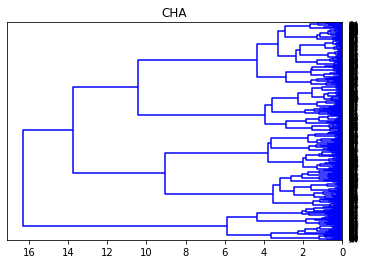

In [340]:
Hierchical_clustering_Viz(data_num_sc)

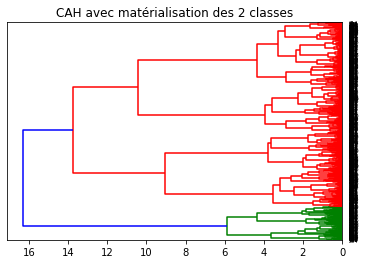

[2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1
 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 

col_0,1,2
Actual_Score,,
1,109,591
2,46,254


In [341]:
Hierchical_clustering_decoupage(data_num_sc,14)

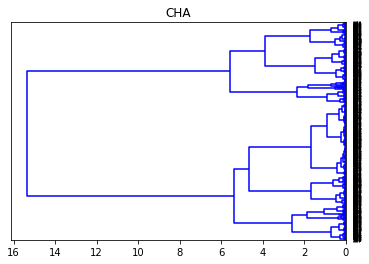

In [342]:
Hierchical_clustering_Viz(reduced_num)

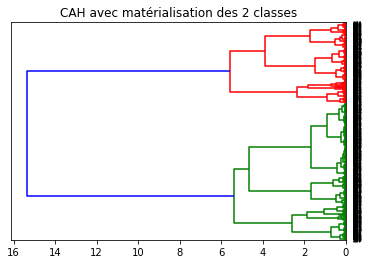

[1 2 2 2 1 2 1 2 2 1 1 1 2 1 2 1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 1 2 2 1 1 1 2
 1 2 1 1 1 2 2 1 1 1 2 2 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 2
 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 1 1 2 1
 1 1 2 2 1 2 1 2 1 1 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1
 1 2 2 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 2 2 2 1 1
 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 2
 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 2 1 1 2
 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 2 2 1 1 1 2 1 1
 2 1 2 2 1 1 1 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 2
 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 1 2 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1
 2 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 1 1 1 2 1 1 2 2 2 2 

col_0,1,2
Actual_Score,,
1,429,271
2,202,98


In [343]:
Hierchical_clustering_decoupage(reduced_num,6)

In [246]:
405/700

0.5785714285714286

In [247]:
172/300

0.5733333333333334

## Quali

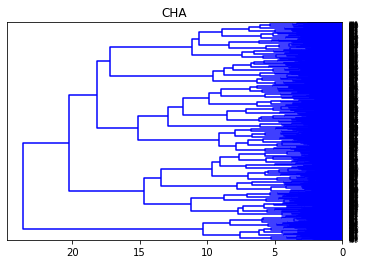

In [344]:
Hierchical_clustering_Viz(data_cat)

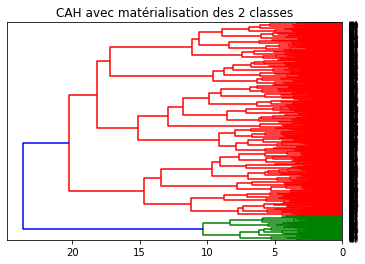

[2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 1 2 2 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 1 2 

col_0,1,2
Actual_Score,,
1,64,636
2,50,250


In [229]:
Hierchical_clustering_decoupage(data_cat,21)

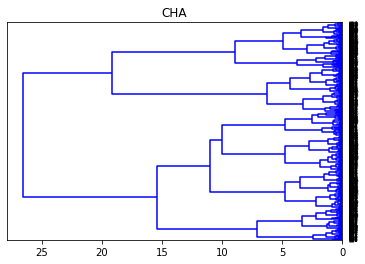

In [186]:
Hierchical_clustering_Viz(reduced_cat)

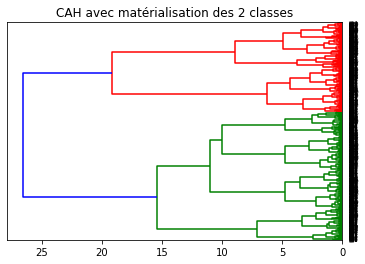

[2 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2
 1 1 1 2 1 1 1 2 1 2 1 2 1 2 2 1 2 2 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 2 1
 2 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1
 1 2 2 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 2 2 2
 2 2 2 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 1
 1 2 2 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1
 1 1 1 2 2 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 2 2 2 1
 1 2 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 2 2 1 1 1
 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 2 1 2
 1 2 1 1 2 2 2 1 2 1 1 1 1 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 1 1 2 2 1 2 1 1 2
 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 2 1 1 1 1 1 2 1
 1 1 1 2 2 1 1 1 1 2 2 1 

col_0,1,2
Actual_Score,,
1,389,311
2,202,98


In [228]:
Hierchical_clustering_decoupage(reduced_cat,20)

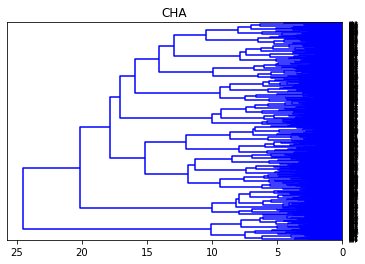

In [316]:
Hierchical_clustering_Viz(data_join)

In [315]:
data_join.drop(columns="Existing_Credits",inplace=True)
data_join.drop(columns="Residence",inplace=True)

KeyError: "['Existing_Credits'] not found in axis"

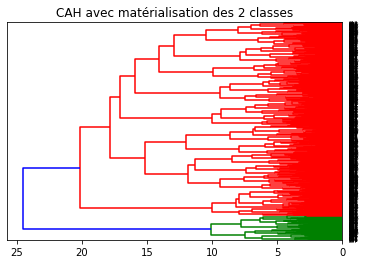

[2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 1 2 

col_0,1,2
Actual_Score,,
1,68,632
2,43,257


In [317]:
Hierchical_clustering_decoupage(data_join,21)

In [248]:
626/700

0.8942857142857142

In [249]:
247/300

0.8233333333333334

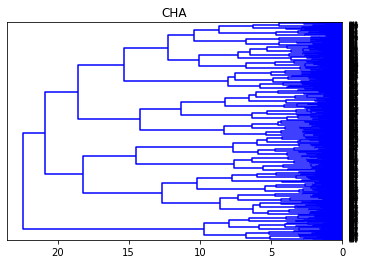

In [241]:
Hierchical_clustering_Viz(reduced_join)

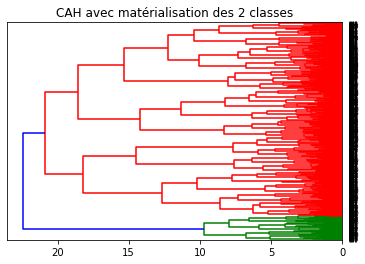

[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 1 2 

col_0,1,2
Actual_Score,,
1,69,631
2,42,258


In [345]:
Hierchical_clustering_decoupage(reduced_join,21)

## Classification

In [348]:
#spliting the dataset into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(, Y, test_size = 0.25, random_state = 0)

In [349]:
data_cat.head()

,A11,A12,A13,A14,A30,A31,A32,A33,A34,A40,...,A143,A151,A152,A153,A171,A172,A173,A174,A201,A202
0,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
